## Prétraitement du dataset

### Importer les bibliothèques utiles

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import scipy.fft as fft
import scipy.signal as signal

In [ ]:
sns.set_style("darkgrid")

### Lire les données

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/inrae/icos/D_meteo_fluxes_FR-Bil_2015_2022.csv')
dff.head()

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,RECO,P
0,1,2015,1,FR-Bil,2015-01-01 13:15:00,2.129500,236.455278,3.646765,2.606778,-2.056866,1.554918,0.000
1,2,2015,2,FR-Bil,2015-01-02 13:15:00,4.807500,181.507111,4.409038,2.355167,-2.559287,1.825543,0.000
2,3,2015,3,FR-Bil,2015-01-03 13:30:00,11.026647,81.873765,4.439173,1.910706,-1.959193,2.486712,1.241
3,4,2015,4,FR-Bil,2015-01-04 13:30:00,12.877941,94.259353,6.243830,2.051529,-3.564290,2.699011,1.964
4,5,2015,5,FR-Bil,2015-01-05 13:15:00,6.067889,169.532833,7.797282,0.669667,-5.804766,1.969068,0.000


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/inrae/icos/D_meteo_fluxes_FR-Bil_2015_2022.csv')
df1.head()

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,RECO,P
0,1,2015,1,FR-Bil,2015-01-01 13:15:00,2.129500,236.455278,3.646765,2.606778,-2.056866,1.554918,0.000
1,2,2015,2,FR-Bil,2015-01-02 13:15:00,4.807500,181.507111,4.409038,2.355167,-2.559287,1.825543,0.000
2,3,2015,3,FR-Bil,2015-01-03 13:30:00,11.026647,81.873765,4.439173,1.910706,-1.959193,2.486712,1.241
3,4,2015,4,FR-Bil,2015-01-04 13:30:00,12.877941,94.259353,6.243830,2.051529,-3.564290,2.699011,1.964
4,5,2015,5,FR-Bil,2015-01-05 13:15:00,6.067889,169.532833,7.797282,0.669667,-5.804766,1.969068,0.000


In [ ]:
df1.columns

Index(['Unnamed: 0', 'Year', 'DoY', 'station.name', 'DateTime', 'Tair', 'Rg',
       'GPP', 'VPD', 'NEE_F', 'RECO', 'P'],
      dtype='object')

In [ ]:
df1.info() # 2922 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2922 non-null   int64  
 1   Year          2922 non-null   int64  
 2   DoY           2922 non-null   int64  
 3   station.name  2922 non-null   object 
 4   DateTime      2922 non-null   object 
 5   Tair          2922 non-null   float64
 6   Rg            2922 non-null   float64
 7   GPP           2922 non-null   float64
 8   VPD           2922 non-null   float64
 9   NEE_F         2922 non-null   float64
 10  RECO          2922 non-null   float64
 11  P             2922 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 274.1+ KB


In [ ]:
df1.isna().sum() # c ok

Unnamed: 0      0
Year            0
DoY             0
station.name    0
DateTime        0
Tair            0
Rg              0
GPP             0
VPD             0
NEE_F           0
RECO            0
P               0
dtype: int64

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/inrae/icos/D_SWC_FR-Bil_2015_2022.csv')
df2.head()

,Unnamed: 0,Year,DoY,DateTime,SMSSO4_10cm_3491_Avg,SMSSO4_10cm_5502_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_22cm_5504_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_60cm_3497_Avg,SMSSO4_85cm_5508_Avg
0,1,2015,1,2015-01-01 11:45:00,0.086700,0.096835,0.163156,0.099029,0.061558,0.057044,0.047104,0.069011
1,2,2015,2,2015-01-02 11:45:00,0.084119,0.093920,0.160910,0.096300,0.059802,0.055472,0.046544,0.068502
2,3,2015,3,2015-01-03 11:45:00,0.082899,0.092817,0.159007,0.093783,0.058179,0.053987,0.045941,0.067753
3,4,2015,4,2015-01-04 11:45:00,0.086224,0.095856,0.159345,0.093113,0.056857,0.052661,0.045341,0.066953
4,5,2015,5,2015-01-05 11:45:00,0.086753,0.096755,0.160409,0.094375,0.056400,0.051847,0.044950,0.066715


In [ ]:
df2.columns

Index(['Unnamed: 0', 'Year', 'DoY', 'DateTime', 'SMSSO4_10cm_3491_Avg',
       'SMSSO4_10cm_5502_Avg', 'SMSSO4_22cm_4663_Avg', 'SMSSO4_22cm_5504_Avg',
       'SMSSO4_40cm_4925_Avg', 'SMSSO4_60cm_3176_Avg', 'SMSSO4_60cm_3497_Avg',
       'SMSSO4_85cm_5508_Avg'],
      dtype='object')

In [ ]:
df2.isna().sum()

Unnamed: 0                0
Year                      0
DoY                       0
DateTime                  0
SMSSO4_10cm_3491_Avg      4
SMSSO4_10cm_5502_Avg      4
SMSSO4_22cm_4663_Avg      4
SMSSO4_22cm_5504_Avg      4
SMSSO4_40cm_4925_Avg      4
SMSSO4_60cm_3176_Avg      4
SMSSO4_60cm_3497_Avg    601
SMSSO4_85cm_5508_Avg      4
dtype: int64

In [ ]:
cols = ['SMSSO4_10cm_5502_Avg', 'SMSSO4_22cm_5504_Avg', 'SMSSO4_60cm_3497_Avg']
df2.drop(cols, axis=1, inplace=True) # on garde une seule colonne pour chaque profondeur

In [ ]:
df2.columns

Index(['Unnamed: 0', 'Year', 'DoY', 'DateTime', 'SMSSO4_10cm_3491_Avg',
       'SMSSO4_22cm_4663_Avg', 'SMSSO4_40cm_4925_Avg', 'SMSSO4_60cm_3176_Avg',
       'SMSSO4_85cm_5508_Avg'],
      dtype='object')

In [ ]:
df2.isna().sum()

Unnamed: 0              0
Year                    0
DoY                     0
DateTime                0
SMSSO4_10cm_3491_Avg    4
SMSSO4_22cm_4663_Avg    4
SMSSO4_40cm_4925_Avg    4
SMSSO4_60cm_3176_Avg    4
SMSSO4_85cm_5508_Avg    4
dtype: int64

In [ ]:
df2 = df2.interpolate()  # remplir les 4 valeurs manquantes par interp linéaire

In [ ]:
df2.isna().sum()

Unnamed: 0              0
Year                    0
DoY                     0
DateTime                0
SMSSO4_10cm_3491_Avg    0
SMSSO4_22cm_4663_Avg    0
SMSSO4_40cm_4925_Avg    0
SMSSO4_60cm_3176_Avg    0
SMSSO4_85cm_5508_Avg    0
dtype: int64

In [ ]:
# changer format date : ann-mois-jour
# unifier la forme pour faire le merge
df1['DateTime'] = pd.to_datetime(df1['DateTime'])
df1['DateTime'] = df1['DateTime'].dt.strftime('%Y-%m-%d')

# idem
df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df2['DateTime'] = df2['DateTime'].dt.strftime('%Y-%m-%d')

In [ ]:
df = pd.merge(df1, df2, on=['Unnamed: 0', 'Year', 'DoY', 'DateTime'])
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df[df['station.name']!='FR-Bil'] # on travaille sur 1 seul site

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,RECO,P,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg


In [ ]:
max_date = df['DateTime'].max()
min_date = df['DateTime'].min()
duration = max_date - min_date
duration

Timedelta('2921 days 00:00:00')

In [ ]:
duration.days//365 # 8 years

8

In [ ]:
first_date = df.iloc[0].DateTime
print(f"de : {first_date.strftime('%Y-%m-%d')}")
last_date = df.iloc[-1].DateTime
print(f"à : {last_date.strftime('%Y-%m-%d')}")

de : 2015-01-01
à : 2022-12-31


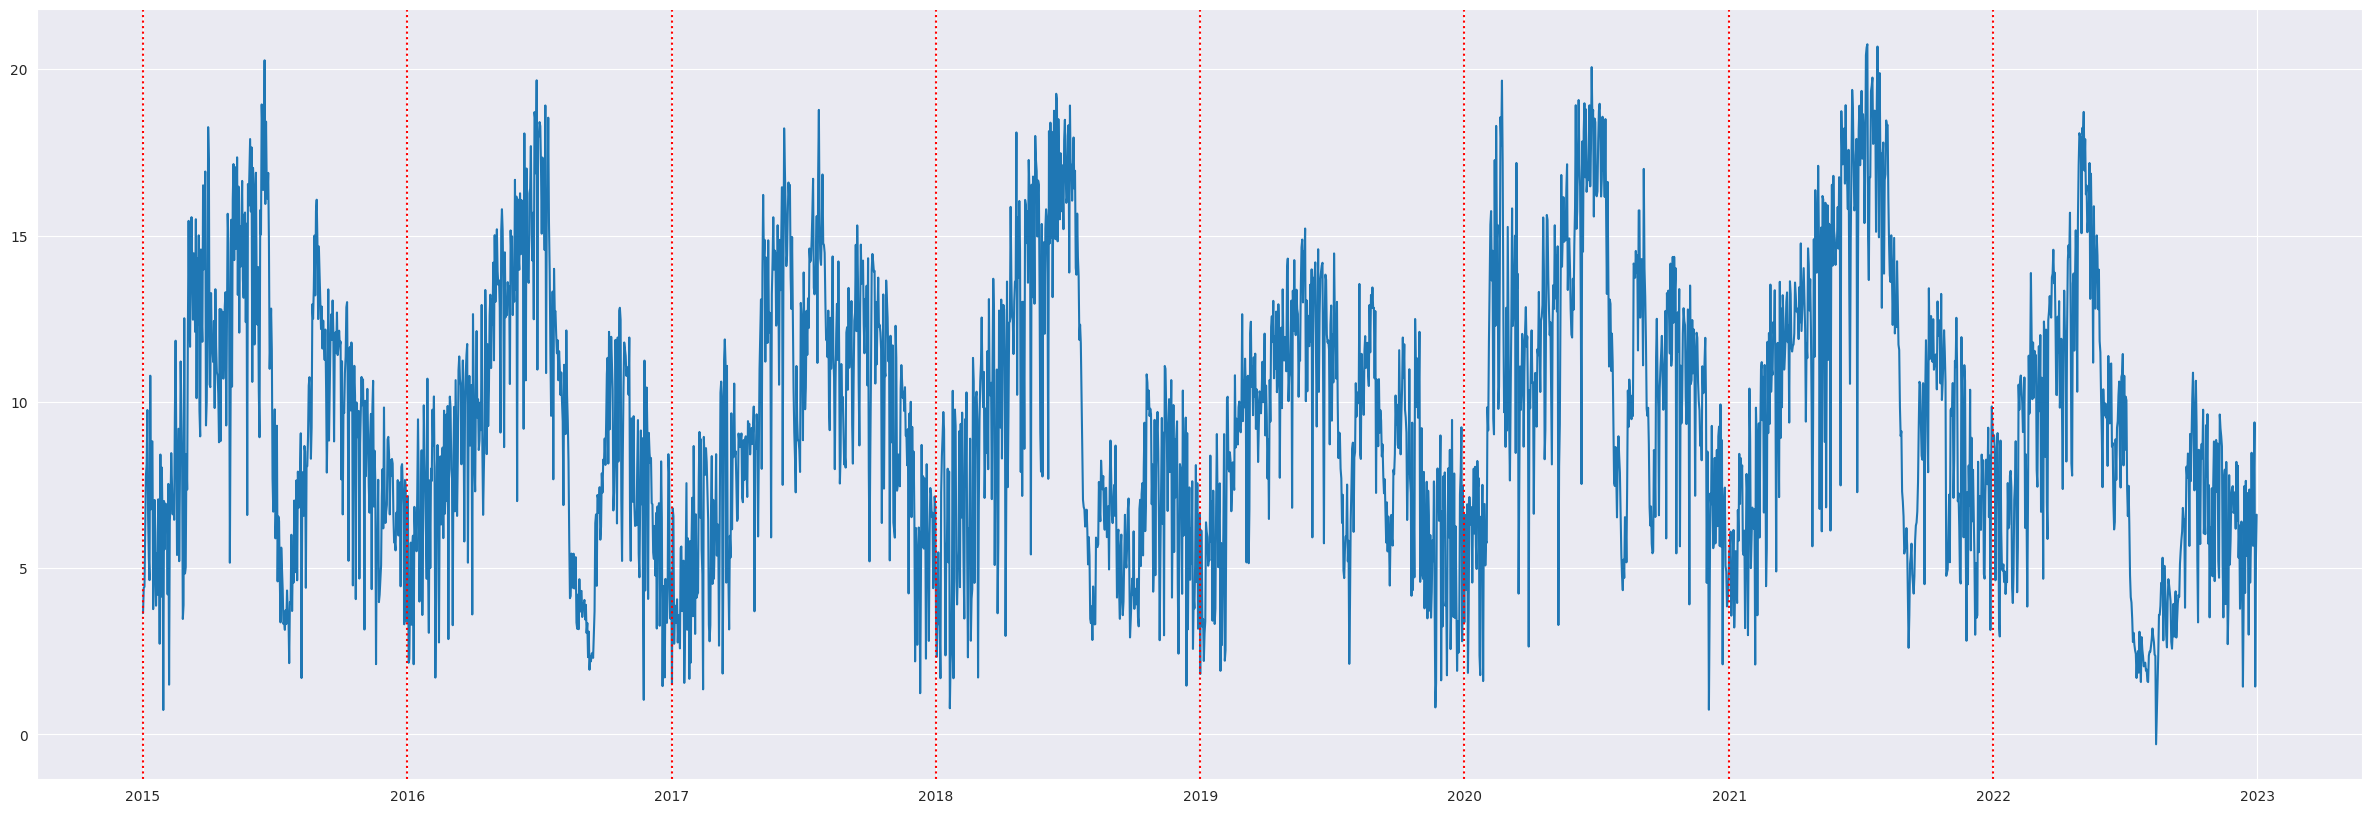

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df['DateTime'],df['GPP'])

unique_years = df['DateTime'].dt.year.unique()
#print(unique_years)

for year in unique_years:
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='red', linestyle='dotted')

plt.show()

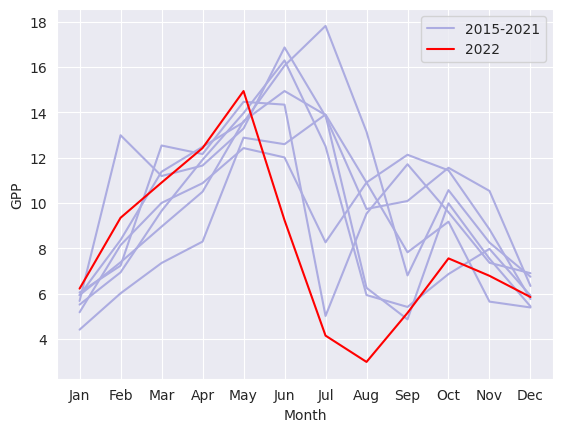

In [ ]:
#plt.figure(figsize=(5,4))
df['Month'] = df['DateTime'].dt.month

grouped = df.groupby(['Year','Month'])['GPP'].mean()

year_colors = {2022: 'red'}
default_color = '#ACACE1'

for year, data in grouped.groupby(level=0):
    color = year_colors.get(year,default_color)
    data.plot(label=year, color=color)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(0,12), months)
plt.xlabel('Month')
plt.ylabel('GPP')
custom_legend = [plt.Line2D([], [], color='#ACACE1', label='2015-2021'),plt.Line2D([], [], color='red', label='2022')]
plt.legend(handles=custom_legend)
plt.show()

In [ ]:
df.drop('Month',axis=1)

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,RECO,P,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,1.554918,0.000,0.086700,0.163156,0.061558,0.057044,0.069011
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,1.825543,0.000,0.084119,0.160910,0.059802,0.055472,0.068502
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,2.486712,1.241,0.082899,0.159007,0.058179,0.053987,0.067753
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,2.699011,1.964,0.086224,0.159345,0.056857,0.052661,0.066953
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,1.969068,0.000,0.086753,0.160409,0.056400,0.051847,0.066715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2918,2022,361,FR-Bil,2022-12-27,12.370000,190.304444,7.606389,1.999333,-4.944338,2.625636,0.100,0.075544,0.144837,0.052613,0.044469,0.061269
2918,2919,2022,362,FR-Bil,2022-12-28,13.084706,225.631176,9.381777,4.543176,-6.725318,2.617632,0.000,0.074046,0.143549,0.051709,0.043759,0.060927
2919,2920,2022,363,FR-Bil,2022-12-29,11.620000,31.114118,1.440885,0.323353,1.062166,2.460614,15.800,0.091326,0.149425,0.051049,0.043188,0.060470
2920,2921,2022,364,FR-Bil,2022-12-30,15.400000,114.915882,5.250922,3.485353,-2.669409,2.512887,2.500,0.112975,0.170768,0.061112,0.045150,0.062779


### Extraire les composantes (annuelles et cycliques) à partir du GPP

$$X_t =
\overline{X}^{365d}_t +
\overline{X_t - \bar{X}^{365d}_t} +
\tilde{X_t}$$

avec :
$$\overline{X}^{T} = \frac{1}{N} \sum_{k=1}^{N} X_{t+kT}$$

In [ ]:
########################   Filtrage signal   ############################################################

"""
    filter_gpp(gpp,σ_ann,σ_ano,periodic_filtering=True)
"""
def filter_gpp(gpp,n_ann=9,n_ano=3,periodic_filtering=True):
    n=gpp.size
    σ_ann=n_ann/2
    σ_ano=n_ano/2
    gauss_ann=signal.windows.gaussian(n,σ_ann)
    gauss_ann/=gauss_ann.sum()
    if periodic_filtering :
        gpp_ann=fft.ifft(np.abs(fft.fft(gauss_ann))*fft.fft(gpp)).real
    else :
        gpp_ann=signal.fftconvolve(gpp,gauss_ann,mode="same")

    gauss_ano=signal.windows.gaussian(n,σ_ano)
    gauss_ano=fft.fft(gauss_ano)*(1-np.abs(fft.fft(gauss_ann)))
    gauss_ano/=np.max(np.abs(gauss_ano))
    gauss_ano=fft.ifft(gauss_ano).real

    gpp_ano=signal.fftconvolve(gpp,gauss_ano,mode="same")
    gpp_noise = gpp-gpp_ano-gpp_ann
    return gpp_ann,gpp_ano,gpp_noise

In [ ]:
df['GPP_ann_s'],df['GPP_anomalies_s'],df['GPP_noise'] = filter_gpp(df['GPP'].to_numpy(),n_ann=30,n_ano=10,periodic_filtering=False)

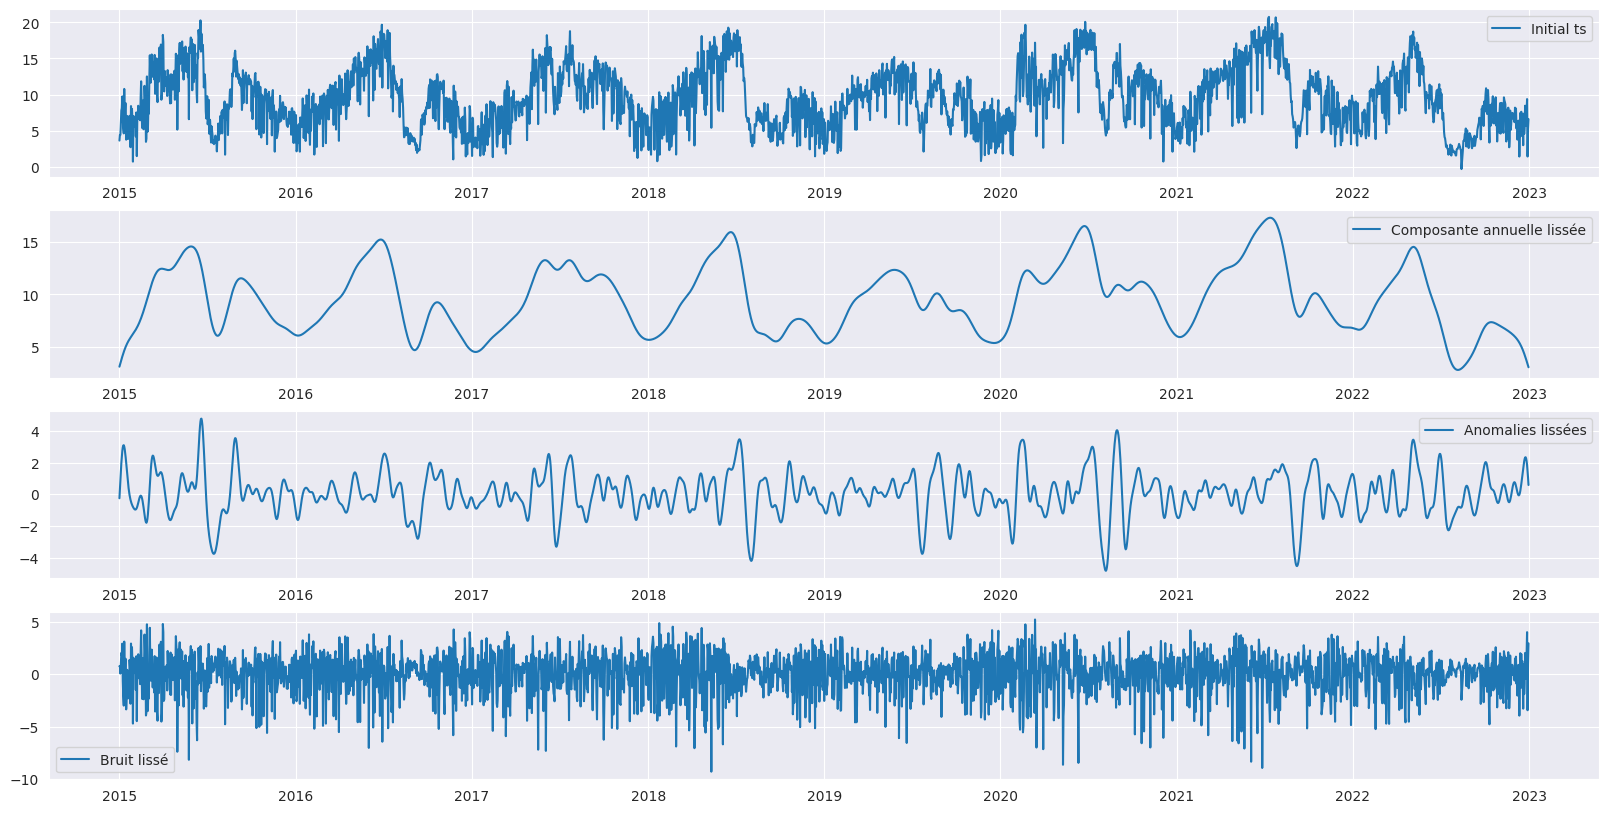

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(411)
plt.plot(df['DateTime'], df['GPP'])
plt.legend(['Initial ts'])

plt.subplot(412)
plt.plot(df['DateTime'], df['GPP_ann_s'])
plt.legend(['Composante annuelle lissée'])

plt.subplot(413)
plt.plot(df['DateTime'], df['GPP_anomalies_s'])
plt.legend(['Anomalies lissées'])

plt.subplot(414)
plt.plot(df['DateTime'], df['GPP_noise'])
plt.legend(['Bruit lissé'])

plt.show()

In [ ]:
########################   Périodiser le signal annuel   ############################################################

"""
Le calcul est fait de façon cyclique.. en effet, si les données pour t+1 an et t+2 .. t+N ans ne sont pas disponibles,
les valeurs sont complétées par les données du début (et ce de manière cyclique)
Cela permet de traiter les cas où les N dernières années n'ont pas suffisamment de données disponibles...
"""

def calculate_annual_component(df=df,T=365,N=5):
    """
    Calcule la composante annuelle d'un df à partir du GPP

    Args:
        df
        N : Le nombre d'années à prendre en compte pour le calcul (par déf 5)
        T : Le nombre de jours dans une année (par déf 365)

    Returns:
        df: Le df mis à jour avec la colonne 'GPP_ann' contenant la composante annuelle périodisée
    """
    for index, row in df.iterrows():
        t = index  # indice de l'observation courante
        partial_sum = 0.0
        count = 0

        # calculer la somme des observations des années suivantes
        for i in range(N):
            observation_index = (t+(i+1)*T)%len(df)  # indice de l'observation après i+1 années, modulo pour éviter les erreurs d'index hors limite
            partial_sum += df.iloc[observation_index]['GPP_ann_s']  # récupérer gpp correspondant à l'indice
            count += 1

        # calculer la moyenne de la composante annuelle
        if count==N:
            df.at[index, 'GPP_ann'] = partial_sum/count
        else:
            print('count != N !!!!')

    return df

In [ ]:
df = calculate_annual_component(df, T=365, N=8)

In [ ]:
df['GPP_anomalies'] = df['GPP_ann_s']-df['GPP_ann']+df['GPP_anomalies_s']

In [ ]:
# quick check
for i, row in df.iterrows():
  if round(row['GPP_ann']+row['GPP_anomalies']+row['GPP_noise'],3) != round(row['GPP'],3):
    print('erreur décomposition !!')
print('décomposition ok')

décomposition ok


In [ ]:
# df['Year'] = df['DateTime'].dt.year

# def count_days_per_year(group):
#     if len(group) > 0:
#         # 366
#         if pd.Timestamp(group['Year'].iloc[0]).is_leap_year:
#             return len(group)
#         # 365 jours
#         else:
#             return len(group)
#     else:
#         return 0

# days_per_year = df.groupby('Year').apply(count_days_per_year)

# print(days_per_year)

In [ ]:
df.iloc[-1]

Unnamed: 0                             2922
Year                                   2022
DoY                                     365
station.name                         FR-Bil
DateTime                2022-12-31 00:00:00
Tair                              17.395882
Rg                               190.147647
GPP                                 6.60705
VPD                               11.314118
NEE_F                             -4.108245
RECO                               2.404548
P                                       0.0
SMSSO4_10cm_3491_Avg               0.101058
SMSSO4_22cm_4663_Avg               0.166489
SMSSO4_40cm_4925_Avg               0.067013
SMSSO4_60cm_3176_Avg               0.050797
SMSSO4_85cm_5508_Avg               0.066317
GPP_ann_s                          3.084073
GPP_anomalies_s                    0.581954
GPP_noise                          2.941023
GPP_ann                            5.484204
GPP_anomalies                     -1.818176
Name: 2921, dtype: object

In [ ]:
# plt.figure(figsize=(30,10))
# plt.plot(df['DateTime'], df['GPP'], label='initial gpp')
# plt.plot(df['DateTime'], df['GPP_ann'], label='gpp ann')
# plt.plot(df['DateTime'], df['GPP_anomalies'], label='anomalies')
# plt.plot(range(0,2922), grouped['GPP'].to_numpy()*8)
# #plt.plot(df['DateTime'][:366], grouped['GPP'])
# plt.legend()
# plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'DoY', 'station.name', 'DateTime', 'Tair', 'Rg',
       'GPP', 'VPD', 'NEE_F', 'RECO', 'P', 'SMSSO4_10cm_3491_Avg',
       'SMSSO4_22cm_4663_Avg', 'SMSSO4_40cm_4925_Avg', 'SMSSO4_60cm_3176_Avg',
       'SMSSO4_85cm_5508_Avg', 'GPP_ann_s', 'GPP_anomalies_s', 'GPP_noise',
       'GPP_ann', 'GPP_anomalies'],
      dtype='object')

In [ ]:
# df['Day'] = df['DateTime'].dt.day
# df['Month'] = df['DateTime'].dt.month
# df['y'] = df['DateTime'].dt.year

# gr = df.groupby(['y'])['GPP'].mean().reset_index()

In [ ]:
grouped = df.groupby(['DoY'])['GPP'].mean().reset_index()
grouped

,DoY,GPP
0,1,4.326525
1,2,6.014253
2,3,5.268479
3,4,4.131216
4,5,5.131425
...,...,...
361,362,6.314130
362,363,5.107162
363,364,6.216131
364,365,5.713075


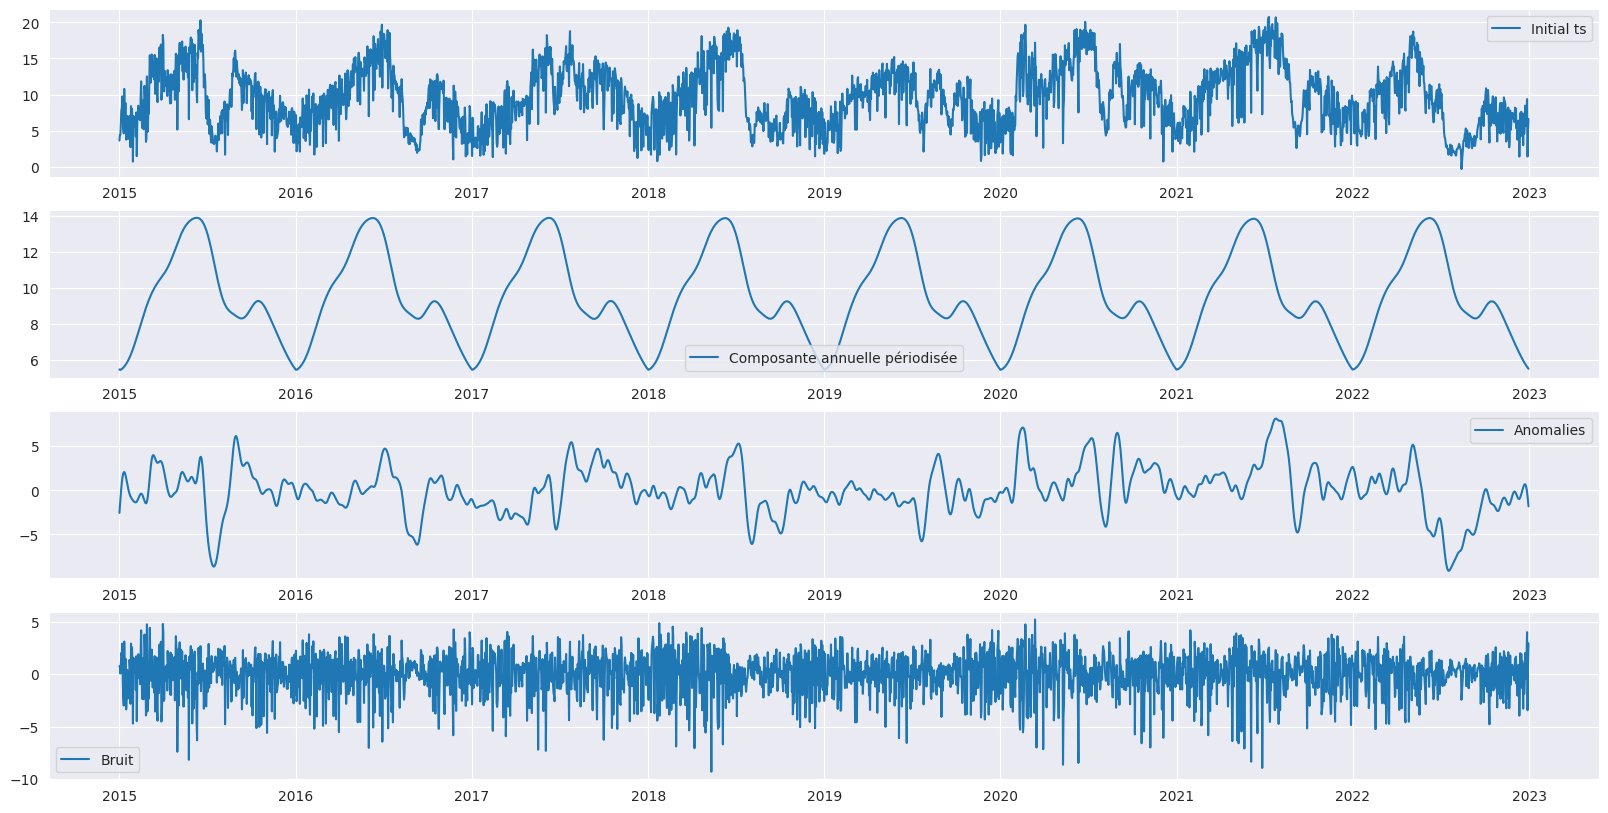

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(411)
plt.plot(df['DateTime'], df['GPP'])
plt.legend(['Initial ts'])

plt.subplot(412)
plt.plot(df['DateTime'], df['GPP_ann'])
plt.legend(['Composante annuelle périodisée'])

plt.subplot(413)
plt.plot(df['DateTime'], df['GPP_anomalies'])
plt.legend(['Anomalies'])

plt.subplot(414)
plt.plot(df['DateTime'], df['GPP_noise'])
plt.legend(['Bruit'])

plt.show()

In [ ]:
df.drop(['GPP_ann_s', 'GPP_anomalies_s'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'DoY', 'station.name', 'DateTime', 'Tair', 'Rg',
       'GPP', 'VPD', 'NEE_F', 'RECO', 'P', 'SMSSO4_10cm_3491_Avg',
       'SMSSO4_22cm_4663_Avg', 'SMSSO4_40cm_4925_Avg', 'SMSSO4_60cm_3176_Avg',
       'SMSSO4_85cm_5508_Avg', 'GPP_noise', 'GPP_ann', 'GPP_anomalies'],
      dtype='object')

### Configurer le temps

In [ ]:
df['Time (s)'] = df['DateTime'].apply(lambda x: x.timestamp())  # convertir t en secondes
df['Time (s)'] = df['Time (s)'] - df['Time (s)'][0]             # commencer de 0

In [ ]:
# on a privilégié une forme sinusoïdale pour le temps (entrée utile pour le modèle, celui-ci saura se situer dans le temps)

d = 24*3600
# df['cos day'] = np.cos(df['Time (s)']*(2*np.pi/d))
# df['sin day'] = np.sin(df['Time (s)']*(2*np.pi/d))

y = 365*d
df['cos year'] = np.cos(df['Time (s)']*(2*np.pi/y))
df['sin year'] = np.sin(df['Time (s)']*(2*np.pi/y))

df.head()

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,...,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg,GPP_noise,GPP_ann,GPP_anomalies,Time (s),cos year,sin year
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,...,0.163156,0.061558,0.057044,0.069011,0.762554,5.452100,-2.567889,0.0,1.000000,0.000000
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,...,0.160910,0.059802,0.055472,0.068502,0.782234,5.422189,-1.795385,86400.0,0.999852,0.017213
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,...,0.159007,0.058179,0.053987,0.067753,0.063957,5.420821,-1.045605,172800.0,0.999407,0.034422
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,...,0.159345,0.056857,0.052661,0.066953,1.145975,5.435837,-0.337982,259200.0,0.998667,0.051620
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,...,0.160409,0.056400,0.051847,0.066715,2.032368,5.453269,0.311645,345600.0,0.997630,0.068802


In [ ]:
# supprimer les colonnes dont on va plus s'en servir
df.drop('Time (s)', axis=1, inplace=True)

In [ ]:
df

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,...,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg,GPP_noise,GPP_ann,GPP_anomalies,cos year,sin year
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,...,0.086700,0.163156,0.061558,0.057044,0.069011,0.762554,5.452100,-2.567889,1.000000,0.000000e+00
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,...,0.084119,0.160910,0.059802,0.055472,0.068502,0.782234,5.422189,-1.795385,0.999852,1.721336e-02
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,...,0.082899,0.159007,0.058179,0.053987,0.067753,0.063957,5.420821,-1.045605,0.999407,3.442161e-02
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,...,0.086224,0.159345,0.056857,0.052661,0.066953,1.145975,5.435837,-0.337982,0.998667,5.161967e-02
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,...,0.086753,0.160409,0.056400,0.051847,0.066715,2.032368,5.453269,0.311645,0.997630,6.880243e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2918,2022,361,FR-Bil,2022-12-27,12.370000,190.304444,7.606389,1.999333,-4.944338,...,0.075544,0.144837,0.052613,0.044469,0.061269,1.821146,5.631635,0.153607,0.998667,-5.161967e-02
2918,2919,2022,362,FR-Bil,2022-12-28,13.084706,225.631176,9.381777,4.543176,-6.725318,...,0.074046,0.143549,0.051709,0.043759,0.060927,4.008205,5.592202,-0.218630,0.999407,-3.442161e-02
2919,2920,2022,363,FR-Bil,2022-12-29,11.620000,31.114118,1.440885,0.323353,1.062166,...,0.091326,0.149425,0.051049,0.043188,0.060470,-3.430360,5.554397,-0.683152,0.999852,-1.721336e-02
2920,2921,2022,364,FR-Bil,2022-12-30,15.400000,114.915882,5.250922,3.485353,-2.669409,...,0.112975,0.170768,0.061112,0.045150,0.062779,0.956585,5.518351,-1.224014,1.000000,-1.959435e-15


In [ ]:
# sauvegarder pour une utilisation ultérieure
df.to_csv('/content/drive/MyDrive/inrae/icos/final-preprocessed-FR-Bil_2015_2022-second-gpp-decomp.csv', index=False)

## Recommencer avec le nouveau dataset prétraité

In [ ]:
mydf = pd.read_csv('/content/drive/MyDrive/inrae/icos/final-preprocessed-FR-Bil_2015_2022-second-gpp-decomp.csv')
# mydf = pd.read_csv('../data/final-preprocessed-FR-Bil_2015_2022-second-gpp-decomp.csv') # si téléchargé depuis github
mydf['DateTime'] = pd.to_datetime(mydf['DateTime'])
mydf.head()

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,...,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg,GPP_noise,GPP_ann,GPP_anomalies,cos year,sin year
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,...,0.086700,0.163156,0.061558,0.057044,0.069011,0.762554,5.452100,-2.567889,1.000000,0.000000
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,...,0.084119,0.160910,0.059802,0.055472,0.068502,0.782234,5.422189,-1.795385,0.999852,0.017213
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,...,0.082899,0.159007,0.058179,0.053987,0.067753,0.063957,5.420821,-1.045605,0.999407,0.034422
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,...,0.086224,0.159345,0.056857,0.052661,0.066953,1.145975,5.435837,-0.337982,0.998667,0.051620
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,...,0.086753,0.160409,0.056400,0.051847,0.066715,2.032368,5.453269,0.311645,0.997630,0.068802


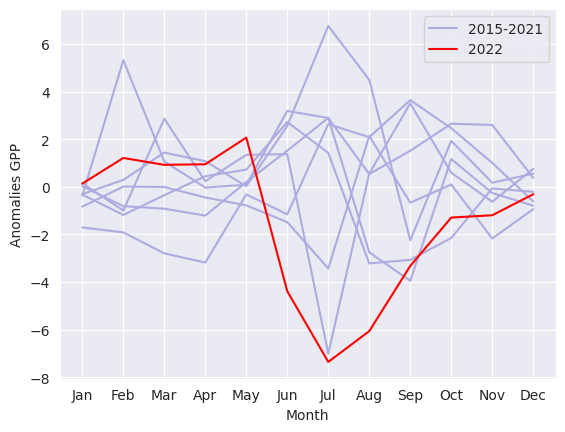

In [ ]:
#plt.figure(figsize=(5,4))
mydf['Month'] = mydf['DateTime'].dt.month
mydf = mydf[mydf['Year']!=2015]

grouped = mydf.groupby(['Year','Month'])['GPP_anomalies'].mean()

year_colors = {2022: 'red'}
default_color = '#ACACE1'

for year, data in grouped.groupby(level=0):
    color = year_colors.get(year,default_color)
    data.plot(label=year, color=color)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(0,12), months)
plt.xlabel('Month')
plt.ylabel('Anomalies GPP')
custom_legend = [plt.Line2D([], [], color='#ACACE1', label='2015-2021'),plt.Line2D([], [], color='red', label='2022')]
plt.legend(handles=custom_legend)
plt.show()

In [ ]:
mydf.drop('Month',axis=1)

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,...,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg,GPP_noise,GPP_ann,GPP_anomalies,cos year,sin year
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,...,0.086700,0.163156,0.061558,0.057044,0.069011,0.762554,5.452100,-2.567889,1.000000,0.000000e+00
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,...,0.084119,0.160910,0.059802,0.055472,0.068502,0.782234,5.422189,-1.795385,0.999852,1.721336e-02
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,...,0.082899,0.159007,0.058179,0.053987,0.067753,0.063957,5.420821,-1.045605,0.999407,3.442161e-02
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,...,0.086224,0.159345,0.056857,0.052661,0.066953,1.145975,5.435837,-0.337982,0.998667,5.161967e-02
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,...,0.086753,0.160409,0.056400,0.051847,0.066715,2.032368,5.453269,0.311645,0.997630,6.880243e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2918,2022,361,FR-Bil,2022-12-27,12.370000,190.304444,7.606389,1.999333,-4.944338,...,0.075544,0.144837,0.052613,0.044469,0.061269,1.821146,5.631635,0.153607,0.998667,-5.161967e-02
2918,2919,2022,362,FR-Bil,2022-12-28,13.084706,225.631176,9.381777,4.543176,-6.725318,...,0.074046,0.143549,0.051709,0.043759,0.060927,4.008205,5.592202,-0.218630,0.999407,-3.442161e-02
2919,2920,2022,363,FR-Bil,2022-12-29,11.620000,31.114118,1.440885,0.323353,1.062166,...,0.091326,0.149425,0.051049,0.043188,0.060470,-3.430360,5.554397,-0.683152,0.999852,-1.721336e-02
2920,2921,2022,364,FR-Bil,2022-12-30,15.400000,114.915882,5.250922,3.485353,-2.669409,...,0.112975,0.170768,0.061112,0.045150,0.062779,0.956585,5.518351,-1.224014,1.000000,-1.959435e-15


### Qlqs courbes

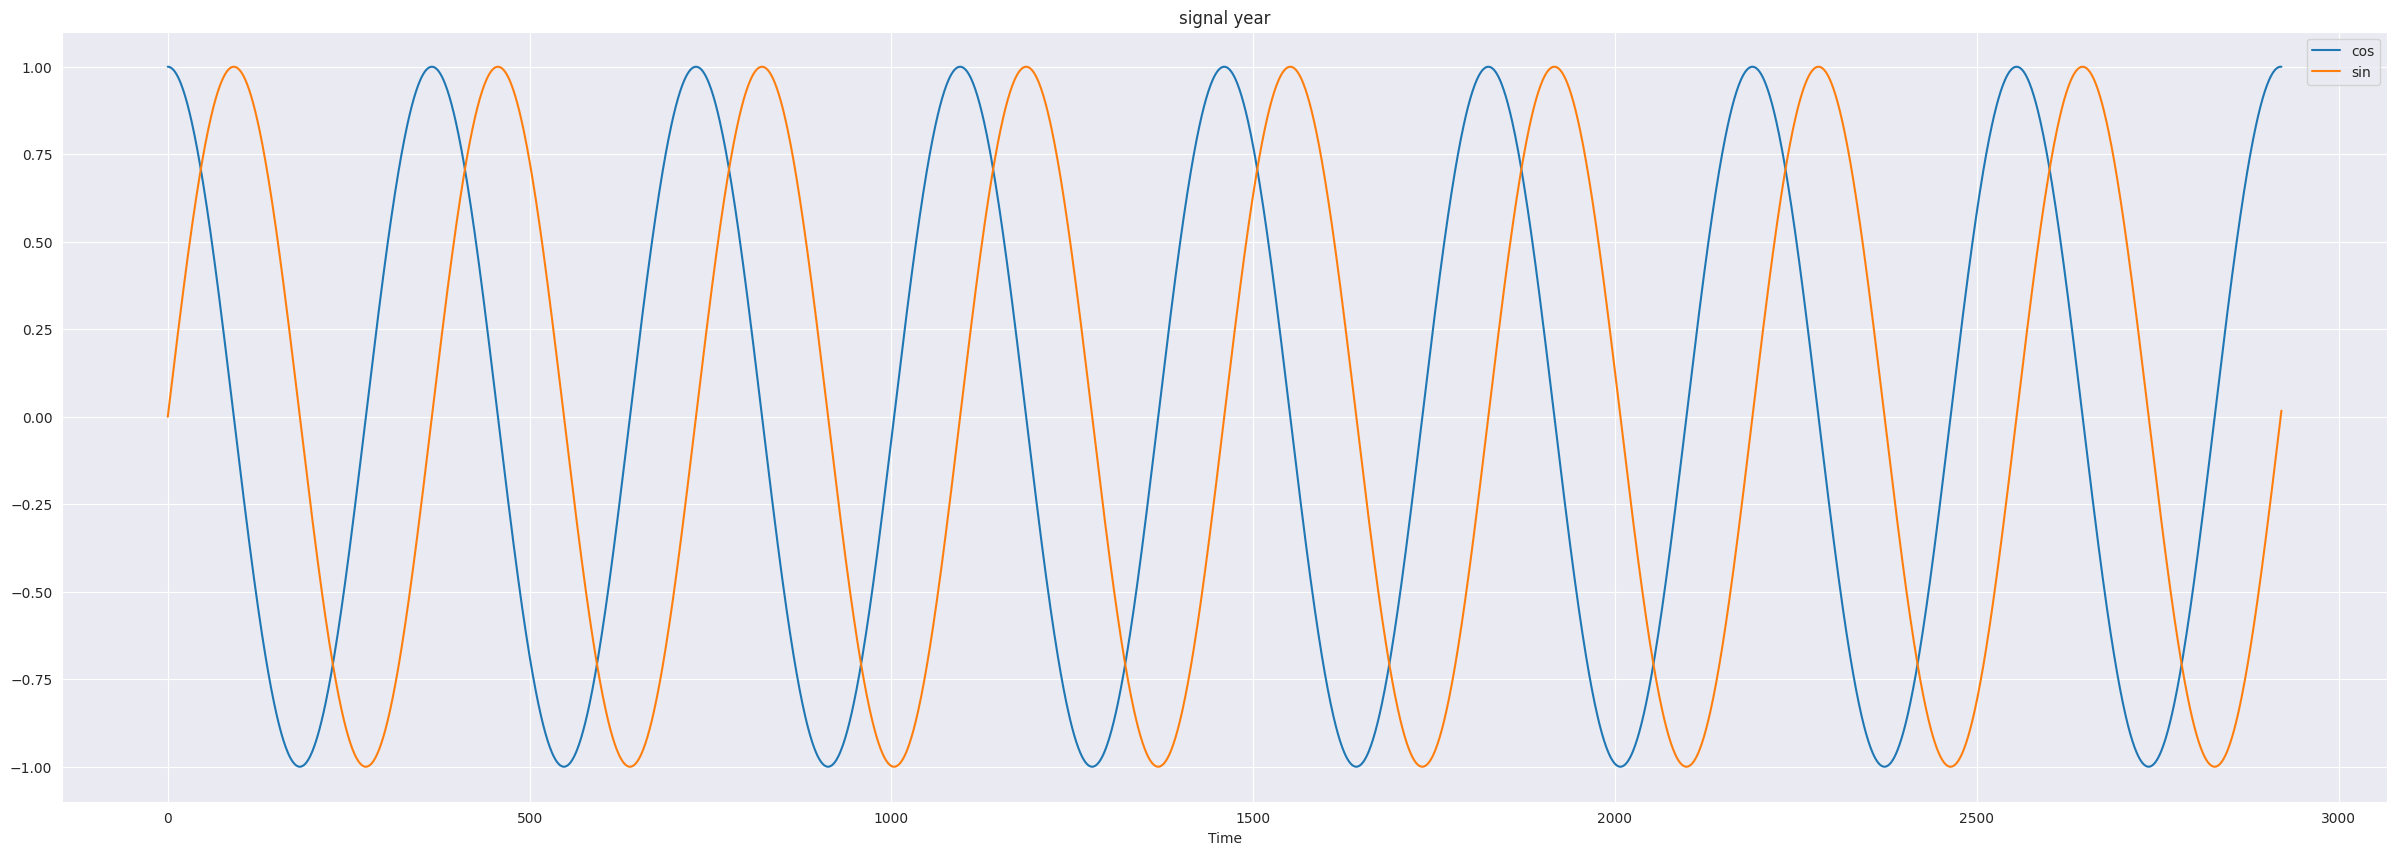

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(mydf['cos year'], label='cos')
plt.plot(mydf['sin year'], label='sin')
plt.xlabel('Time')
plt.title('signal year')
plt.legend()
plt.show()

### Distribution de Delta GPP

In [ ]:
data = mydf.copy()
data.loc[0,'delta_gpp'] = 0
for i in range(1,len(data)):
  data.loc[i, 'delta_gpp'] = data.loc[i,'GPP']-data.loc[i-1,'GPP'] # gpp(t)-gpp(t-1)

In [ ]:
data['delta_gpp']

0       0.000000
1       0.762273
2       0.030135
3       1.804657
4       1.553452
          ...   
2917    1.934043
2918    1.775388
2919   -7.940892
2920    3.810038
2921    1.356128
Name: delta_gpp, Length: 2922, dtype: float64

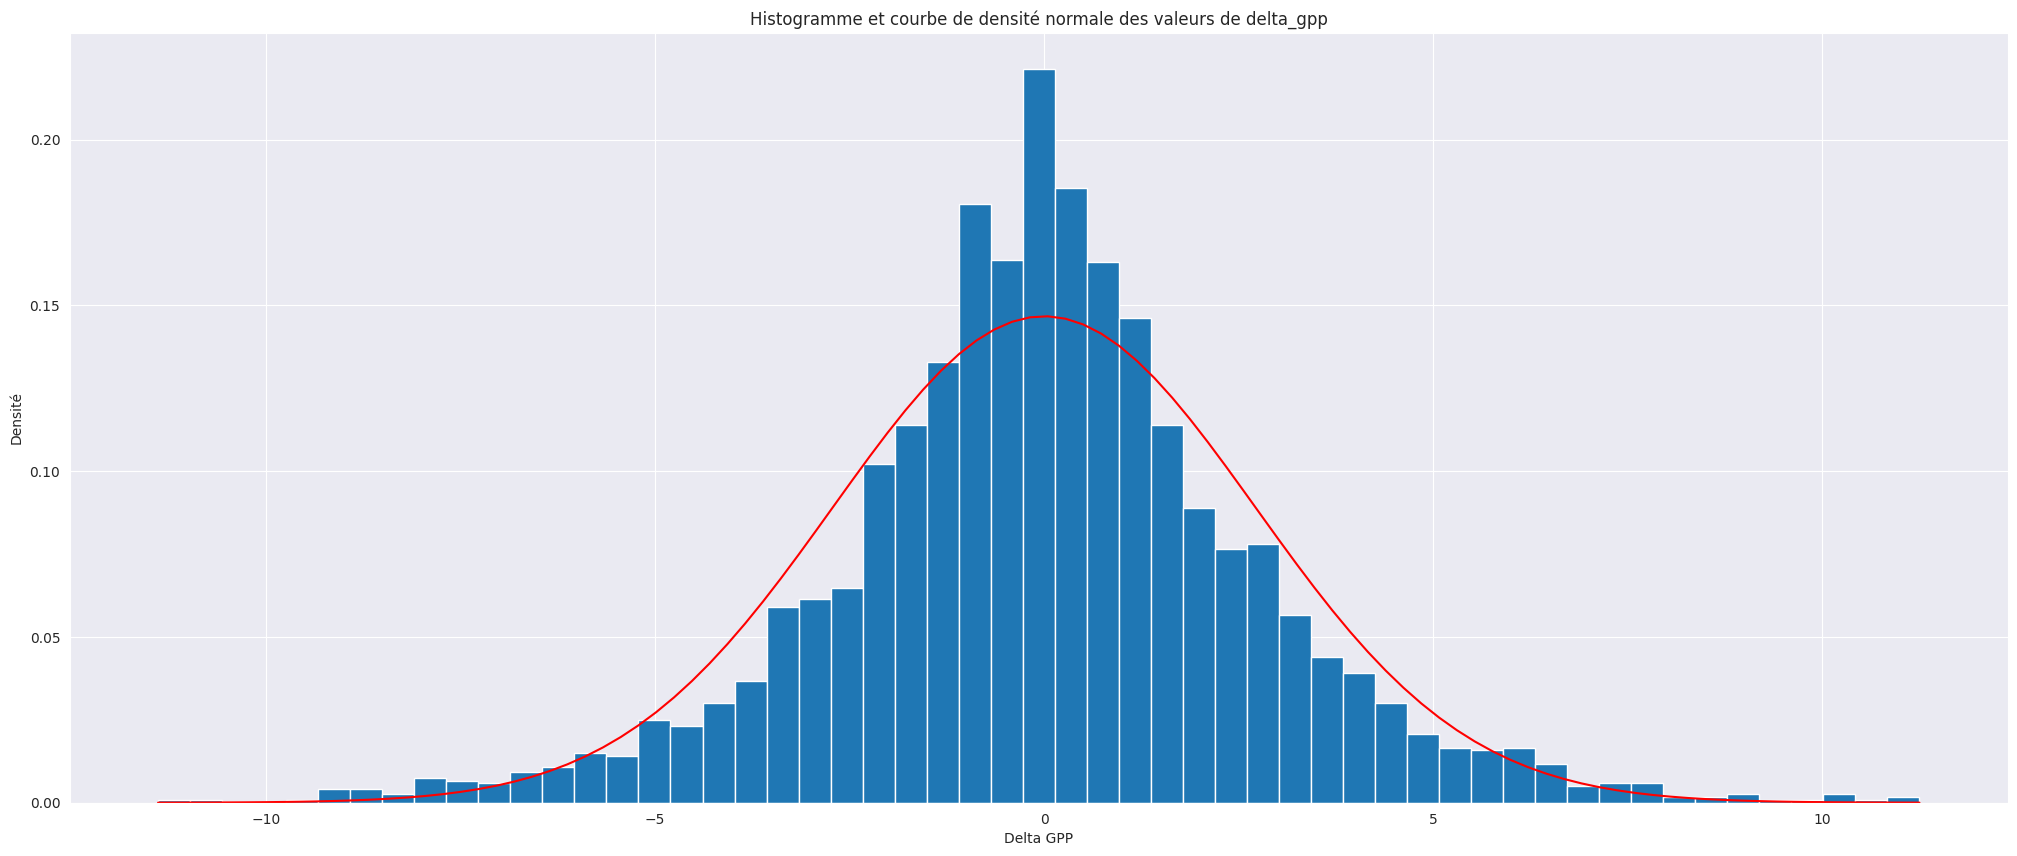

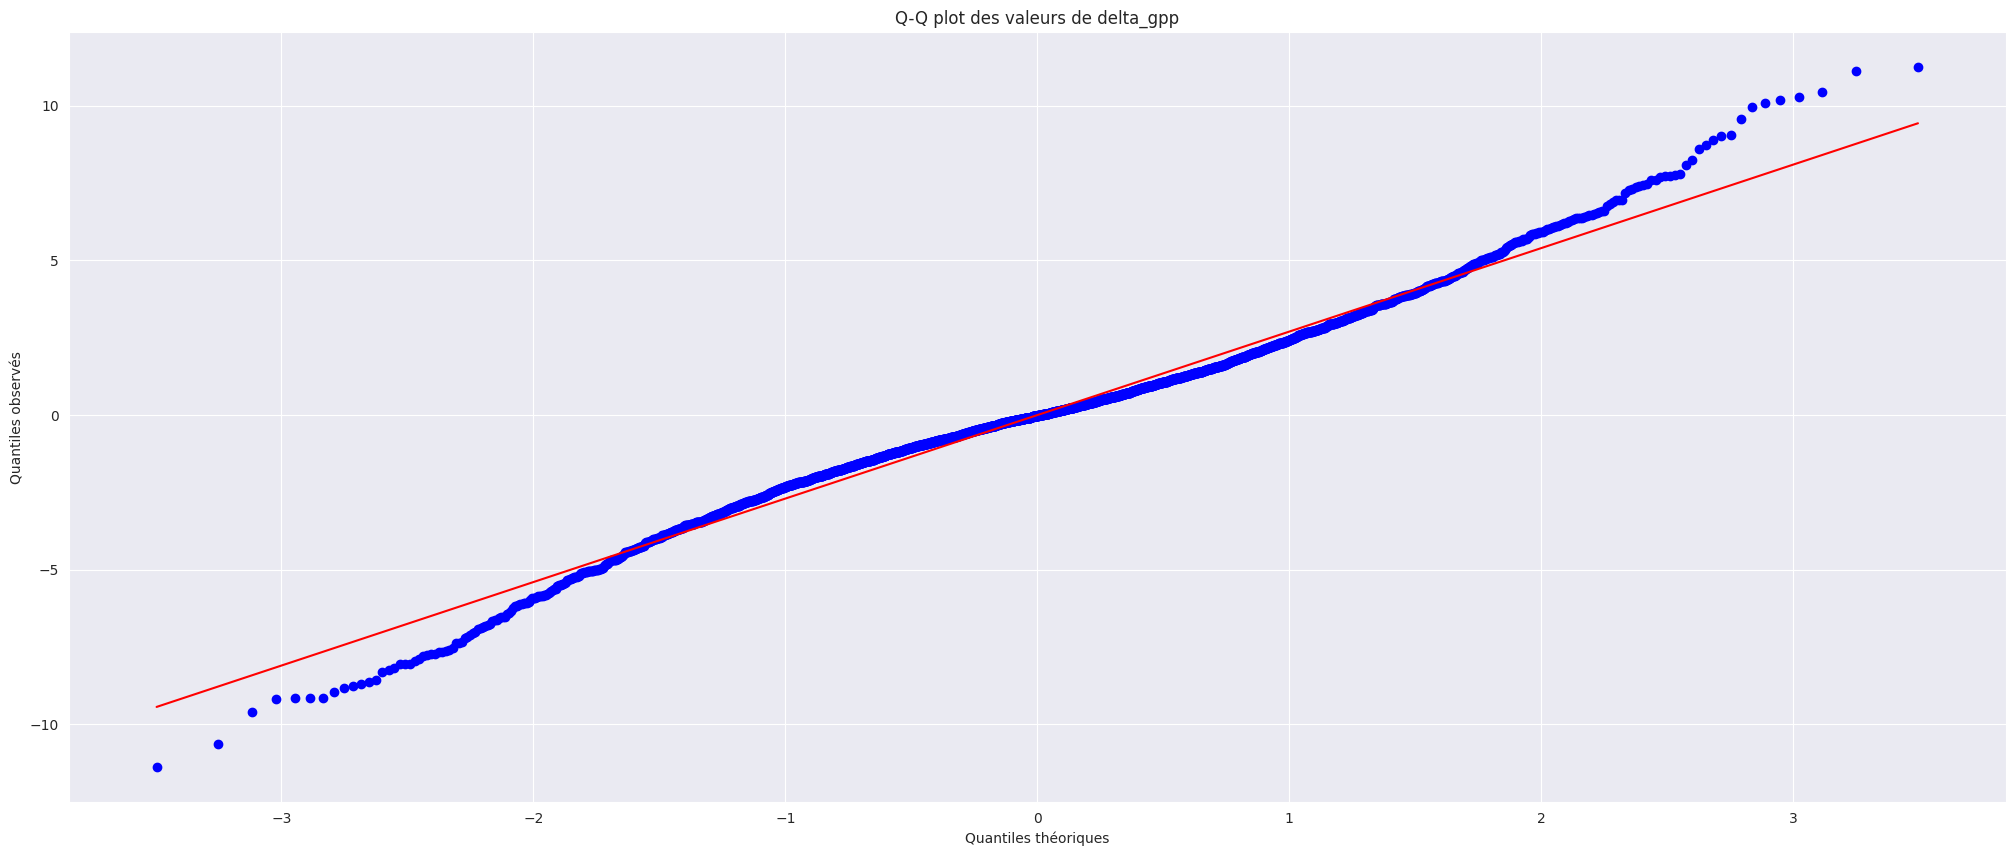

In [ ]:
import scipy.stats as stats
from scipy.stats import norm

# l'histogramme des valeurs de 'delta_gpp'
plt.figure(figsize=(25,10))
plt.hist(data['delta_gpp'], bins='auto', density=True)

# courbe de densité normale
mean_delta_gpp = np.mean(data['delta_gpp']) # moy
std_delta_gpp = np.std(data['delta_gpp'])   # écart type
x = np.linspace(min(data['delta_gpp']), max(data['delta_gpp']), 100)
plt.plot(x, norm.pdf(x, loc=mean_delta_gpp, scale=std_delta_gpp), color='red')

plt.xlabel('Delta GPP')
plt.ylabel('Densité')
plt.title('Histogramme et courbe de densité normale des valeurs de delta_gpp')
plt.show()


# tracer le graphique quantile-quantile (Q-Q plot) des valeurs de 'delta_gpp'
plt.figure(figsize=(25,10))
stats.probplot(data['delta_gpp'], dist='norm', plot=plt)
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles observés')
plt.title('Q-Q plot des valeurs de delta_gpp')
plt.show()